# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

{**TEAM NM1_WAKANDA INSIGHTS**}, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

**TEAM MEMBERS**
1. Azih Jude
2. Emmanuel Obeng Afari
3. Patrick Onduto
4. Salaudeen Adebayo
5. Wasiu Ogunkoya

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. **Wakanda Insights** has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| This section indicates package imports, and a brief discussion of the libraries that will be used throughout this analysis and modelling. |

---

In [72]:
# Importing libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for data preparation and model building
#imports from Sklearn
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Importing the seasonal_decompose from statsmodels for decomposing time series  
from statsmodels.tsa.seasonal import seasonal_decompose

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 24

#setting default column view to 60 columns
pd.options.display.max_columns = 100

%matplotlib inline

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section the train data in loaded from the `df_train` file into a DataFrame. |

---

In [73]:
# Loading train data with time column as the index column and displaying first five rows the data 
train_df = pd.read_csv('df_train.csv', parse_dates=['time'], index_col='time').drop('Unnamed: 0', axis=1)
train_df.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [74]:
# Loading test data with time column as the index column and displaying first five rows the data
test_df = pd.read_csv('df_test.csv', parse_dates=['time'], index_col='time').drop('Unnamed: 0', axis=1)
test_df.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,4.000000,176.666667,0.0,1.000000,0.0,sp25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.000000,NaN,284.483333,1030.000000,287.483333,287.483333,801.000000,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,4.666667,266.666667,0.0,0.666667,0.0,sp25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.000000,NaN,282.483333,1030.333333,284.150000,284.150000,721.000000,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,4.000000,263.333333,0.0,0.666667,0.0,sp25,0.0,0,1023.000000,0.0,0.0,0.0,0,800.0,800.000000,1025.333333,800.333333,NaN,280.816667,1030.666667,282.816667,282.816667,800.000000,280.613333,42.000000,282.816667,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,2.333333,86.666667,0.0,1.333333,0.0,sp25,0.0,0,1025.666667,0.0,0.0,0.0,0,800.0,800.000000,1025.000000,800.333333,NaN,281.150000,1032.333333,283.483333,283.483333,801.333333,279.936667,45.000000,283.483333,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,4.666667,283.333333,0.0,1.000000,0.0,sp25,0.0,0,1026.000000,0.0,0.0,0.0,0,800.0,800.333333,1022.333333,800.000000,NaN,287.150000,1032.333333,287.150000,287.150000,801.333333,285.570000,41.000000,287.150000,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


### Summary Statistics
We will explore the data types and the summary statistics of our variables.

Let's look at the shape, features (columns), data types and number of entries of each column.

#### View the shape of the train data to determine number of observations and features therein
***

In [75]:
# Determine number of columns and rows
rows, columns = train_df.shape
print('Number of observations in the train data are {}'.format(rows),
      'Number of features in the train data are {}'.format(columns), sep='\n')

Number of observations in the train data are 8763
Number of features in the train data are 47


In [76]:
# Determine names of columns
column_names = train_df.columns
column_names

Index(['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min', 'Madri

#### Determine the features' various data types and the number of entries in the data
***

In [77]:
# Determine the data types of features (numerical and category)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8763 entries, 2015-01-01 03:00:00 to 2017-12-31 21:00:00
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Madrid_wind_speed     8763 non-null   float64
 1   Valencia_wind_deg     8763 non-null   object 
 2   Bilbao_rain_1h        8763 non-null   float64
 3   Valencia_wind_speed   8763 non-null   float64
 4   Seville_humidity      8763 non-null   float64
 5   Madrid_humidity       8763 non-null   float64
 6   Bilbao_clouds_all     8763 non-null   float64
 7   Bilbao_wind_speed     8763 non-null   float64
 8   Seville_clouds_all    8763 non-null   float64
 9   Bilbao_wind_deg       8763 non-null   float64
 10  Barcelona_wind_speed  8763 non-null   float64
 11  Barcelona_wind_deg    8763 non-null   float64
 12  Madrid_clouds_all     8763 non-null   float64
 13  Seville_wind_speed    8763 non-null   float64
 14  Barcelona_rain_1h     8763 non-null 

**Conclusion**

>From the results of the code above there are **two(2)** categorical features and **forty-five(45)** numerical features. <br>The categorical variables are Valencia_wind_deg and Seville_pressure

> Also, there is one feature with missing values (Valencia_pressure)


#### Separate the continous features and the categorical features
***

In [78]:
# Creating categorical features names
cat_features = ['Valencia_wind_deg', 'Seville_pressure']

# Creating numerical features names by removing categorical features name from the column_name
cont_features = [feature for feature in column_names if not feature in cat_features]

#### Investigate the data's summary statistics
***

In [79]:
#look at data statistics
#Statistics of the numerical features
train_df.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8.763000e+03,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,6695.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,190.544848,19.473392,2.425045,0.128906,0.039439,0.031912,1.377965e+03,0.000243,0.037818,0.000439,0.000205,773.527594,765.979687,1017.739549,774.658818,1012.051407,297.479527,1010.316920,291.337233,290.592152,724.722362,293.978903,65.247727,289.867648,291.157644,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,89.077337,28.053660,1.672895,0.634730,0.175857,0.557264,1.407314e+04,0.003660,0.152639,0.003994,0.011866,77.313315,88.142235,10.046124,71.940009,9.506214,8.875812,22.198555,7.565692,7.162274,115.846537,7.920986,19.262322,6.907402,7.273538,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,972.666667,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,118.166667,0.000000,1.000000,0.000000,0.000000,0.000000,1.014000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.000000,800.000000,1010.333333,291.312750,1012.333333,285.550167,285.150000,700.333333,288.282917,51.333333,284.783333,285.483333,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,200.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.018000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.333333,1019.000000,800.000000,1015.000000,297.101667,1017.333333,291.037000,290.176667,800.000000,293.323333,67.000000,289.550000,290.150000,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,260.000000,33.333333,3.333333,0.000000,0.000000,0.000000,1.022000e+03,0.000000,0.000000,0.000000,0.000000,800.666667,801.000000,1024.000000,800.000000,1018.000000,304.150000,1022.000000,297.248333,296.056667,801.666667,299.620333,81.333333,294.820000,296.855000,296.816667,

**Conclusion**
>Based on the means and stardand devitions from the summary, we wil have to standardise our data's continous features

#### Investigate the continuous features' skewness
***

In [80]:
# Function to describe skewness of features
def describe_skewness(x):
    if (x > -0.5) and (x < 0.5):
        skewness = 'Fairly Symmetrical'
    elif (x > -1) and (x < -0.5):
        skewness = 'Moderate Negative Skew'
    elif (x > 0.5) and (x < 1):
        skewness = 'Moderate Positive Skew'
    elif x < -1:
        skewness = 'High Negative Skew'
    elif x > 1:
        skewness = 'High Positve Skew'
    return skewness

In [81]:
# Skewness of the numerical features
data_skew = train_df.skew()
skew_df = pd.DataFrame({'Feature': data_skew.index, 'Skewness': data_skew.values}) 
skewdf_sorted = skew_df.sort_values('Skewness').reset_index().drop('index', axis=1)
skewdf_sorted['Skewness Description'] = skewdf_sorted['Skewness'].apply(describe_skewness)
skewdf_sorted

,Feature,Skewness,Skewness Description
0,Seville_weather_id,-3.275574,High Negative Skew
1,Madrid_weather_id,-3.107722,High Negative Skew
2,Barcelona_weather_id,-2.584011,High Negative Skew
3,Madrid_pressure,-1.850768,High Negative Skew
4,Valencia_pressure,-1.705162,High Negative Skew
5,Bilbao_weather_id,-1.234844,High Negative Skew
6,Bilbao_pressure,-0.999642,Moderate Negative Skew
7,load_shortfall_3h,-0.384847,Fairly Symmetrical
8,Seville_humidity,-0.310175,Fairly Symmetrical
9,Valencia_humidity,-0.305757,Fairly Symmetrical


#### Investigate the continuous features' kurtosis
***

In [82]:
# Function to describe skewness of features
def describe_kurtosis(x):
    if (x < -3) or (x > 3):
        kurtosis = 'Outliers Present'
    else:
        kurtosis = 'Outliers Absent'
    return kurtosis

In [83]:
# Kurtosis of the numerical features
data_kurt = train_df.kurtosis()
kurt_df = pd.DataFrame({'Feature': data_kurt.index, 'Kurtosis': data_kurt.values})
kurtdf_sorted = kurt_df.sort_values('Kurtosis').reset_index().drop('index', axis=1)
kurtdf_sorted['Kurtosis Description'] = kurtdf_sorted['Kurtosis'].apply(describe_kurtosis)
kurtdf_sorted

,Feature,Kurtosis,Kurtosis Description
0,Bilbao_clouds_all,-1.533417,Outliers Absent
1,Madrid_humidity,-1.167537,Outliers Absent
2,Bilbao_wind_deg,-1.083530,Outliers Absent
3,Seville_humidity,-1.017983,Outliers Absent
4,Barcelona_wind_deg,-0.959160,Outliers Absent
5,Valencia_humidity,-0.734345,Outliers Absent
6,Barcelona_temp_max,-0.728757,Outliers Absent
7,Barcelona_temp,-0.696555,Outliers Absent
8,Madrid_temp_min,-0.666646,Outliers Absent
9,Madrid_temp_max,-0.662861,Outliers Absent


**Conclusion**
>14 of the 45 continuous features exhibit outliers

#### Determine the correlation between the features and plot the correlation heatmap**
***

In [84]:
# evaluate correlation
train_df.corr()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,-0.095380,0.230126,0.434104,0.062758,0.108413,0.071183,0.011134,0.004795,0.150446,-0.014644,0.021660,-0.169358,-0.099582,-0.231747,-0.120014,-0.157088,0.050043,-0.136672,0.133468,0.128726,-0.238128,0.090861,-0.285787,0.119657,0.061854,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,-0.030723,0.135524,0.140101,0.052558,0.092984,0.096730,0.052458,0.016392,0.187423,-0.001412,0.008269,-0.147768,-0.120618,-0.054814,-0.095723,-0.206765,-0.210323,-0.298587,-0.135198,-0.127953,-0.604616,-0.170009,-0.103868,-0.116835,-0.157326,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,-0.066071,0.221887,0.316035,0.031804,0.046085,0.115133,0.050282,0.027637,0.093865,-0.037553,0.058629,-0.099056,-0.037605,-0.096374,-0.069092,-0.041408,-0.024045,-0.158475,0.065815,0.072366,-0.201379,-0.008508,-0.413017,0.075533,-0.040998,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,0.164064,0.366602,-0.202449,-0.051022,0.227476,0.023556,0.021599,0.034343,0.164019,0.015555,0.007351,-0.228442,-0.050515,-0.099458,-0.328265,-0.088094,-0.566426,-0.103813,-0.650643,-0.663276,-0.105088,-0.743126,0.464012,-0.657427,-0.606770,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,0.183725,0.484293,-0.125680,-0.061265,0.195455,0.031653,0.025198,0.059958,0.250614,0.017797,0.012571,-0.341407,-0.051139,-0.053074,-0.291095,-0.168207,-0.576413,-0.121737,-0.705918,-0.706989,-0.139686,-0.738819,0.378980,-0.689854,-0.691803,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,-0.065120,0.109788,0.075066,0.052913,0.041090,0.080180,0.037506,0.009557,0.089281,-0.041013,0.024339,-0.080837,-0.124169,0.000377,-0.033825,-0.079778,-0.102322,-0.135672,0.002621,-0.000299,-0.536205,-0.095003,-0.129684,-0.003806,-0.034040,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,0.275317,-0.018225,0.239326,0.213420,-0.026640,0.073080,-0.001642,0.009572,-0.026037,0.088502,-0.038246,-0.008114,-0.101497,-0.003074,-0.122915,-0.086691,0.054035,0.103342,0.075541,0.091352,0.093919,-0.031661,0.080357,-0.279825,0.093177,0.011151,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,0.136591,-0.0

Text(0.5, 1.0, 'Correlation Matrix')

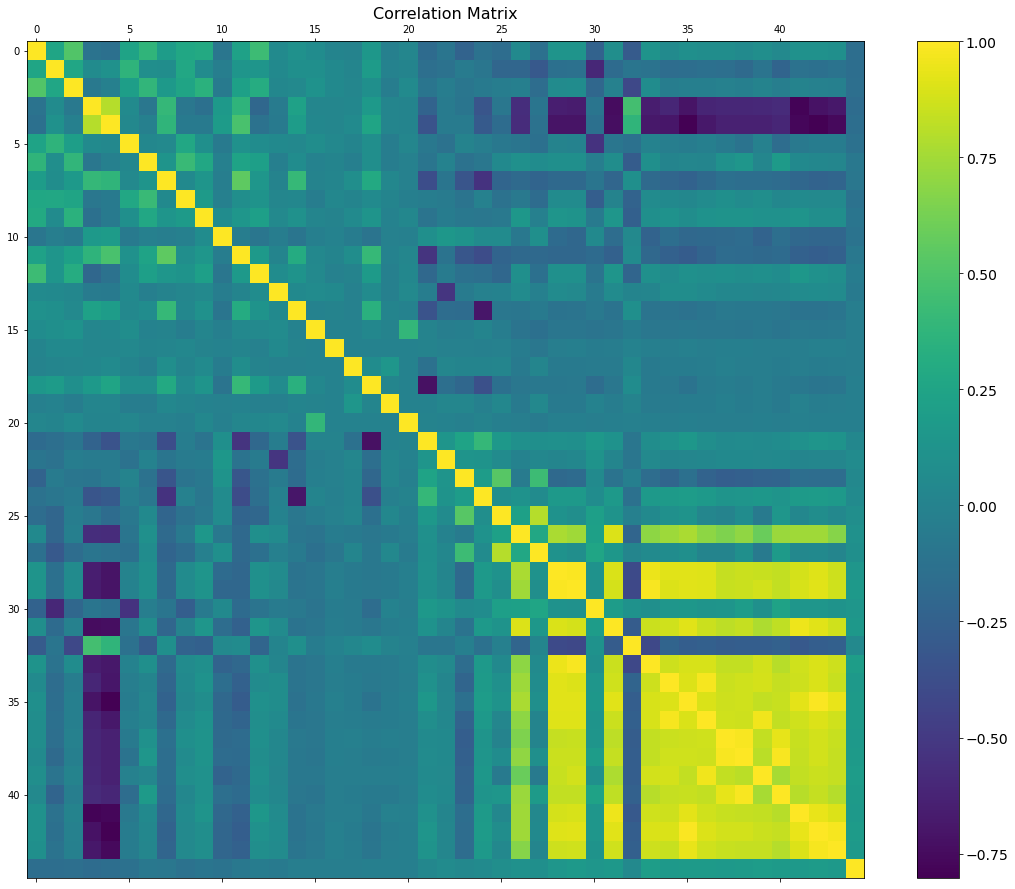

In [85]:
# Correlation  Heatmap
f = plt.figure(figsize=(19, 15))
plt.matshow(train_df.corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [86]:
# Correlation Heatmap with values
corr = train_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,-0.095380,0.230126,0.434104,0.062758,0.108413,0.071183,0.011134,0.004795,0.150446,-0.014644,0.021660,-0.169358,-0.099582,-0.231747,-0.120014,-0.157088,0.050043,-0.136672,0.133468,0.128726,-0.238128,0.090861,-0.285787,0.119657,0.061854,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,-0.030723,0.135524,0.140101,0.052558,0.092984,0.096730,0.052458,0.016392,0.187423,-0.001412,0.008269,-0.147768,-0.120618,-0.054814,-0.095723,-0.206765,-0.210323,-0.298587,-0.135198,-0.127953,-0.604616,-0.170009,-0.103868,-0.116835,-0.157326,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,-0.066071,0.221887,0.316035,0.031804,0.046085,0.115133,0.050282,0.027637,0.093865,-0.037553,0.058629,-0.099056,-0.037605,-0.096374,-0.069092,-0.041408,-0.024045,-0.158475,0.065815,0.072366,-0.201379,-0.008508,-0.413017,0.075533,-0.040998,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,0.164064,0.366602,-0.202449,-0.051022,0.227476,0.023556,0.021599,0.034343,0.164019,0.015555,0.007351,-0.228442,-0.050515,-0.099458,-0.328265,-0.088094,-0.566426,-0.103813,-0.650643,-0.663276,-0.105088,-0.743126,0.464012,-0.657427,-0.606770,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,0.183725,0.484293,-0.125680,-0.061265,0.195455,0.031653,0.025198,0.059958,0.250614,0.017797,0.012571,-0.341407,-0.051139,-0.053074,-0.291095,-0.168207,-0.576413,-0.121737,-0.705918,-0.706989,-0.139686,-0.738819,0.378980,-0.689854,-0.691803,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,-0.065120,0.109788,0.075066,0.052913,0.041090,0.080180,0.037506,0.009557,0.089281,-0.041013,0.024339,-0.080837,-0.124169,0.000377,-0.033825,-0.079778,-0.102322,-0.135672,0.002621,-0.000299,-0.536205,-0.095003,-0.129684,-0.003806,-0.034040,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,0.275317,-0.018225,0.239326,0.213420,-0.026640,0.073080,-0.001642,0.009572,-0.026037,0.088502,-0.038246,-0.008114,-0.101497,-0.003074,-0.122915,-0.086691,0.054035,0.103342,0.075541,0.091352,0.093919,-0.031661,0.080357,-0.279825,0.093177,0.011151,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,0.136591,-0.0

#### Determine the distributions for the continuous features
***

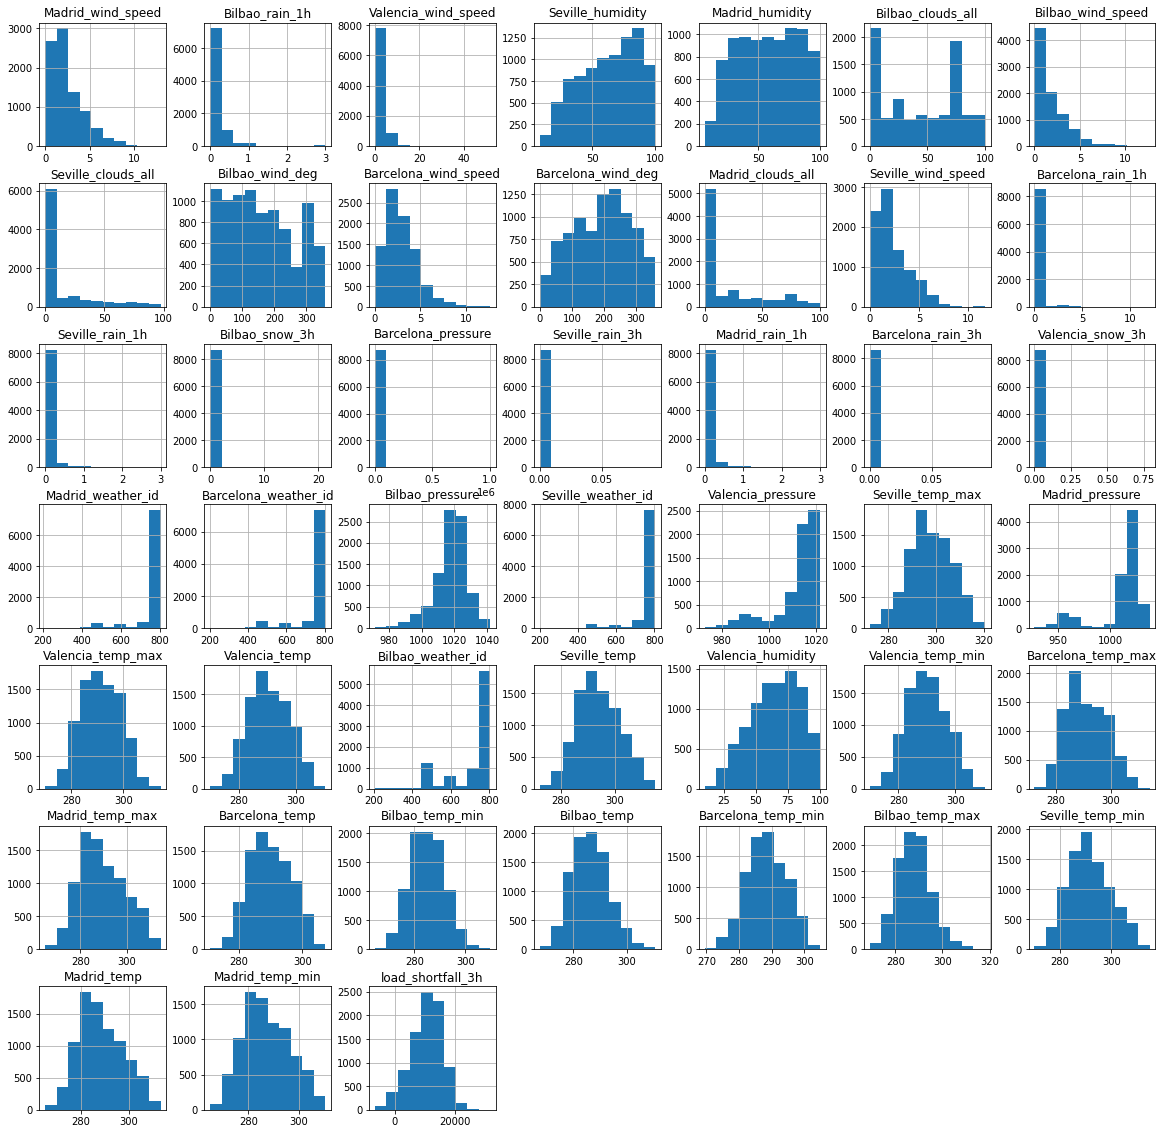

In [87]:
# have a look at feature distributions
# Histogram using bars
train_df[cont_features].hist(figsize=(20,20));

#### Create a bar plot for  the Seville_pressure to investigate the frequency of each category
***

<BarContainer object of 25 artists>

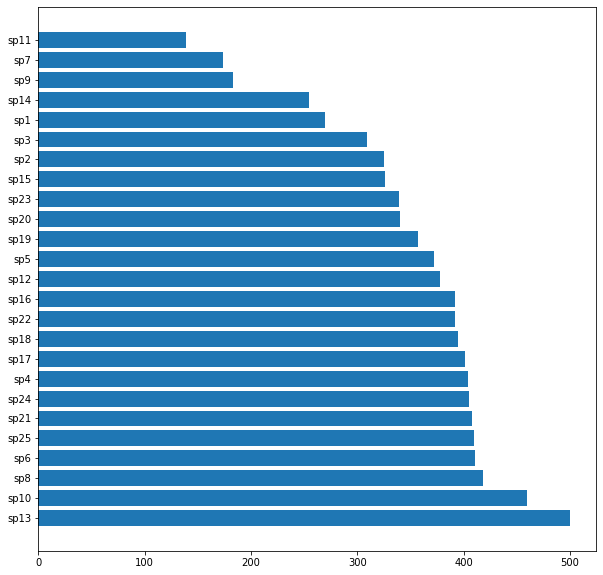

In [88]:
Seville_pressure = train_df[[cat_features[1]]].value_counts().rename_axis('Seville_pressure').reset_index(name='counts')
Seville_pressure

plt.figure(figsize=(10,10))
plt.barh(Seville_pressure['Seville_pressure'], Seville_pressure['counts'])

#### Create a bar plot for  the Valencia_wind_deg to investigate the frequency of each category
***

<BarContainer object of 10 artists>

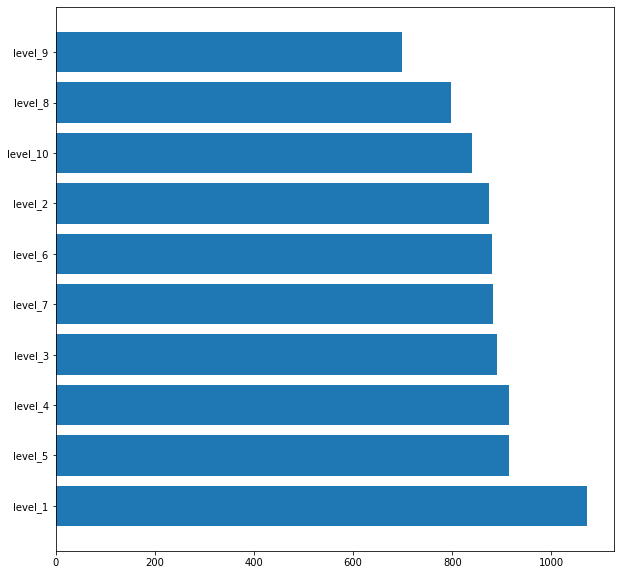

In [89]:
Valencia_wind_deg = train_df[[cat_features[0]]].value_counts().rename_axis('Valencia_wind_deg').reset_index(name='counts')

plt.figure(figsize=(10,10))
plt.barh(Valencia_wind_deg['Valencia_wind_deg'], Valencia_wind_deg['counts'])

#### Investigate and impute missing values in the features
***

In [90]:
# remove missing values/ features
train_df.isnull().sum()

Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp               0
Valencia_humid

In [91]:
#Calculate the percentage of missing values of the Valencia_pressure
round(train_df['Valencia_pressure'].isnull().sum()/train_df.shape[0]*100,2)

23.6

**Conclusion**
>From the result obtained above only Valencia_pressure has missing values of **2068 (about 23.6%)**.
>And, since we have a substantial observations on Valencia_pressure **(76.4%)** we can then impute the Valencia_pressure with its **mode** (since it is a categorical feature)

#### Imputing the Valencia_pressure missing value with its mode to have competeness
***

In [92]:
# Replacing missing values of Valencia_pressure with its mode
Valencia_pressure_mode = train_df['Valencia_pressure'].mode()[0]
train_df['Valencia_pressure'] = train_df['Valencia_pressure'].fillna(train_df['Valencia_pressure'].mode()[0])

In [93]:
# Checking for missing values
train_df.isnull().sum()

Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_max         0
Barcelona_te

#### Investigate the seasonality of the load_short_3h target feature
***

Resample by month the data using the time column and get the monthly mean. Plotting the same to see if there is seasonality. Plotting a vertical line for January of every year to have a visual of the seasonality.

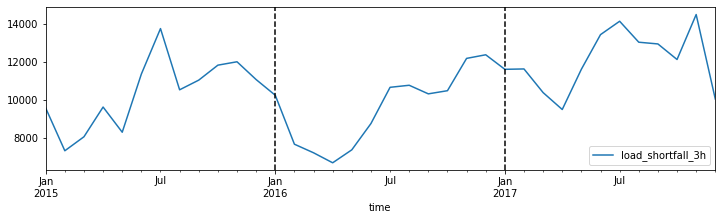

In [94]:
train_resampled = train_df.resample('M').mean()
train_resampled.reset_index(inplace=True)
ax = train_resampled.plot(x='time', y='load_shortfall_3h', figsize=(12,3))
#plotting a vertical line for January of every year
xcoords = ['2016-01-01','2017-01-01', '2018-01-01']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')

**Conclusion**
>Seems like they is seasonality

Using the seasonal_decompose model from the statsmodels library, we break down our resampled data series into its observed, trend, seasonality, and residual components. and since the above figure seems not to change over time, we will use the additive (since the amplitude of our seasonality tends to remain the same) as the model type for seasonality.

In [95]:
train_resampled_analysis = train_resampled.set_index('time')
analysis = train_resampled_analysis[['load_shortfall_3h']].copy()

train_decompose = seasonal_decompose(analysis, model="additive")

dates = train_resampled.time
observed = train_decompose.observed
trend = train_decompose.trend
seasonal = train_decompose.seasonal
residual = train_decompose.resid

**Plot the observed, trend, seasonality, and residual components**

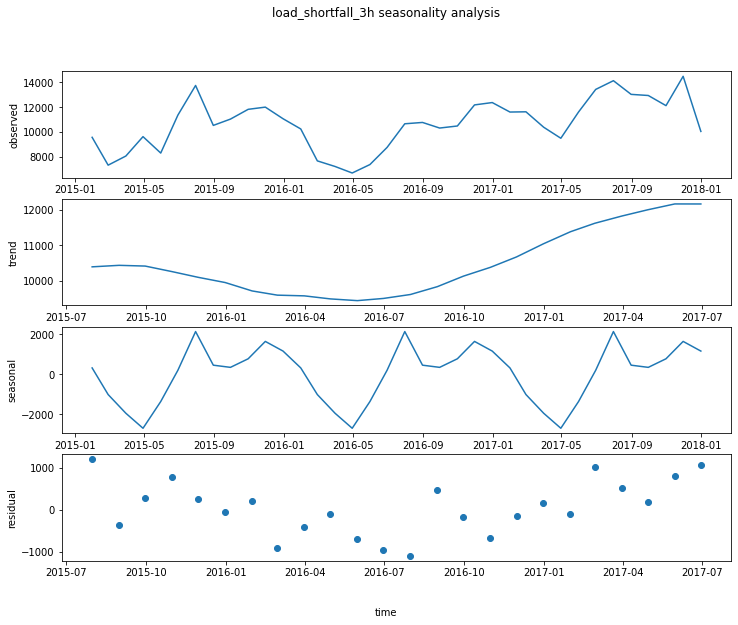

In [96]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(12,9))
fig.figsize = (16,6)
fig.suptitle('load_shortfall_3h seasonality analysis')
fig.text(0.5, 0.04, 'time', ha='center')

ax1.plot(dates, observed)
ax2.plot(dates, trend)
ax3.plot(dates, seasonal)
ax4.scatter(dates, residual)

ax1.set(ylabel='observed')
ax2.set(ylabel='trend')
ax3.set(ylabel='seasonal')
ax4.set(ylabel='residual')
plt.show()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

#### Creating new features from time
***
Since seasonality can be observed in our data, we will create new features for our data. This will include the Year, Month, Day, Day of the week, and Hour

In [97]:
# engineer existing features
# Creating new features from time column
train_df['time'] = pd.to_datetime(train_df.index)
traindf_eng = train_df.copy()
traindf_eng['Year'] = train_df['time'].dt.year
traindf_eng['Month'] = train_df['time'].dt.month
traindf_eng['Day'] = train_df['time'].dt.day
traindf_eng['Day_of_week'] = train_df['time'].dt.dayofweek
traindf_eng['Hour'] = train_df['time'].dt.hour
traindf_eng.drop('time', axis=1, inplace=True)
traindf_eng.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Day,Day_of_week,Hour
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1,3,3
2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1,3,6
2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,1,3,9
2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,2015,1,1,3,12
2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,1018.000000,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,2015,1,1,3,15


**View the shape the newly engineered dataframe**

In [98]:
# Determine number of columns and rows
rows, columns = traindf_eng.shape
print('Number of features has increased to {}'.format(columns))

Number of features has increased to 52


**Creating new Categorical and numerical feature lists**

In [99]:
# Creating categorical features names
cat_features = np.array(['Valencia_wind_deg', 'Seville_pressure'])

# Creating numerical features names by removing categorical features name from the column_name
cont_features = np.array([feature for feature in traindf_eng.columns if feature not in cat_features])

**Encode the categorical features**

In [100]:
#hot encoding the categorical features
encoded_categorical_features_df = pd.get_dummies(
    traindf_eng[cat_features], drop_first=True)
encoded_categorical_features_df.head()

,Valencia_wind_deg_level_10,Valencia_wind_deg_level_2,Valencia_wind_deg_level_3,Valencia_wind_deg_level_4,Valencia_wind_deg_level_5,Valencia_wind_deg_level_6,Valencia_wind_deg_level_7,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9,Seville_pressure_sp10,Seville_pressure_sp11,Seville_pressure_sp12,Seville_pressure_sp13,Seville_pressure_sp14,Seville_pressure_sp15,Seville_pressure_sp16,Seville_pressure_sp17,Seville_pressure_sp18,Seville_pressure_sp19,Seville_pressure_sp2,Seville_pressure_sp20,Seville_pressure_sp21,Seville_pressure_sp22,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 03:00:00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2015-01-01 06:00:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2015-01-01 09:00:00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2015-01-01 12:00:00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2015-01-01 15:00:00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Fitting the model using statsmodels.OLS
***

We need to generate an appropriate string to feed to the method when we wish to fit the model

In [101]:
from statsmodels.formula.api import ols

# Model DataFrame with all of the columns:
dfm = traindf_eng[cont_features].merge(encoded_categorical_features_df, on='time')

# The dependent variable:
y_name = 'load_shortfall_3h'
# The independent variable
# (let's first try all of the columns in the model DataFrame)
X_names = [col for col in dfm.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))

Formula:
	 load_shortfall_3h ~ Madrid_wind_speed + Bilbao_rain_1h + Valencia_wind_speed + Seville_humidity + Madrid_humidity + Bilbao_clouds_all + Bilbao_wind_speed + Seville_clouds_all + Bilbao_wind_deg + Barcelona_wind_speed + Barcelona_wind_deg + Madrid_clouds_all + Seville_wind_speed + Barcelona_rain_1h + Seville_rain_1h + Bilbao_snow_3h + Barcelona_pressure + Seville_rain_3h + Madrid_rain_1h + Barcelona_rain_3h + Valencia_snow_3h + Madrid_weather_id + Barcelona_weather_id + Bilbao_pressure + Seville_weather_id + Valencia_pressure + Seville_temp_max + Madrid_pressure + Valencia_temp_max + Valencia_temp + Bilbao_weather_id + Seville_temp + Valencia_humidity + Valencia_temp_min + Barcelona_temp_max + Madrid_temp_max + Barcelona_temp + Bilbao_temp_min + Bilbao_temp + Barcelona_temp_min + Bilbao_temp_max + Seville_temp_min + Madrid_temp + Madrid_temp_min + Year + Month + Day + Day_of_week + Hour + Valencia_wind_deg_level_10 + Valencia_wind_deg_level_2 + Valencia_wind_deg_level_3 + Vale

**Fitting our model to the data:**

In [102]:
# Fit the model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     27.59
Date:                Wed, 25 May 2022   Prob (F-statistic):               0.00
Time:                        23:49:08   Log-Likelihood:                -86429.
No. Observations:                8763   AIC:                         1.730e+05
Df Residuals:                    8680   BIC:                         1.736e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

**Conclusion**
>Seems like there is strong multicollinearity (warning[2]) 

### Select Variables by Correlation and Significance
***

Now, let's look at the correlations between the load_shortfall_3h and each variables in our DataFrame and select those with the strongest correlations (both positive and negative)

In [103]:
# Calculate correlations between predictor variables and the response variable
corrs = dfm.corr()['load_shortfall_3h'].sort_values(ascending=False)

Using Pearson regression from SciPy

In [104]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'load_shortfall_3h']
for col in column_titles:
    p_val = round(pearsonr(dfm[col], dfm['load_shortfall_3h'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.5]

,Correlation_Coefficient,P_Value
Valencia_temp_min,0.201863,0.000000
Barcelona_weather_id,0.063868,0.000000
Seville_weather_id,0.061104,0.000000
Valencia_wind_deg_level_2,0.060976,0.000000
Day_of_week,-0.156510,0.000000
...,...,...
Valencia_wind_deg_level_6,0.009554,0.371164
Seville_pressure_sp8,0.009394,0.379274
Seville_pressure_sp17,0.008170,0.444430
Seville_pressure_sp13,-0.008127,0.446825


**Let's now use a significance value of 5% (p-value < 0.5) to select some of the columns**

In [105]:
# The dependent variable remains the same:
y_data = dfm[y_name] 

# Model building - Independent Variable (IV) DataFrame
X_names = list(df_cp[df_cp['P_Value'] < 0.05].index)
X_data = dfm[X_names]
len(X_names)

60

We also need to look for predictor variable pairs which have a high correlation with each other to avoid autocorrelation.
Instead of looking at the whole correlation matrix, we isolate the sections of the correlation matrix to where the off-diagonal correlations are high (i.e > 0.9):

In [106]:
# As before, we create the correlation matrix
# and find rows and columnd where correlation coefficients > 0.9 or <-0.9
corr = X_data.corr()
r, c = np.where(np.abs(corr) > 0.9)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corr.iloc[r[off_diagonal], c[off_diagonal]]

,Valencia_temp,Valencia_temp_max,Barcelona_temp,Barcelona_temp,Madrid_temp_max,Madrid_temp_min,Seville_temp_min,Valencia_temp,Seville_temp,Valencia_temp_max,Barcelona_temp_min,Madrid_temp,Madrid_temp_max,Valencia_temp,Barcelona_temp_max,Valencia_temp_max,Madrid_temp,Barcelona_temp,Madrid_temp_min,Seville_temp_min,Valencia_temp,Barcelona_temp_max,Seville_temp,Valencia_temp_max,Bilbao_temp,Bilbao_temp_min,Bilbao_temp_max,Bilbao_temp_min,Madrid_temp,Madrid_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_max,Madrid_temp_min,Seville_temp,Valencia_temp_min,Madrid_temp,Barcelona_temp,Madrid_temp_max,Barcelona_temp_max,Valencia_temp_max,Bilbao_temp_max,Bilbao_temp,Barcelona_temp,Madrid_temp_max,Valencia_temp,Valencia_temp_max,Madrid_temp,Madrid_temp_max,Seville_temp_min,Seville_temp_max,Valencia_temp_min,Madrid_temp,Barcelona_temp,Madrid_temp_max,Valencia_temp,Barcelona_temp_max,Seville_temp
Valencia_temp_min,0.985479,0.949377,0.892024,0.892024,0.893368,0.860347,0.871738,0.985479,0.852492,0.949377,0.879687,0.897012,0.893368,0.985479,0.860510,0.949377,0.897012,0.892024,0.860347,0.871738,0.985479,0.860510,0.852492,0.949377,0.832393,0.832773,0.806606,0.832773,0.897012,0.893368,0.871738,0.897012,0.893368,0.860347,0.852492,1.000000,0.897012,0.892024,0.893368,0.860510,0.949377,0.806606,0.832393,0.892024,0.893368,0.985479,0.949377,0.897012,0.893368,0.871738,0.694121,1.000000,0.897012,0.892024,0.893368,0.985479,0.860510,0.852492
Valencia_temp_min,0.985479,0.949377,0.892024,0.892024,0.893368,0.860347,0.871738,0.985479,0.852492,0.949377,0.879687,0.897012,0.893368,0.985479,0.860510,0.949377,0.897012,0.892024,0.860347,0.871738,0.985479,0.860510,0.852492,0.949377,0.832393,0.832773,0.806606,0.832773,0.897012,0.893368,0.871738,0.897012,0.893368,0.860347,0.852492,1.000000,0.897012,0.892024,0.893368,0.860510,0.949377,0.806606,0.832393,0.892024,0.893368,0.985479,0.949377,0.897012,0.893368,0.871738,0.694121,1.000000,0.897012,0.892024,0.893368,0.985479,0.860510,0.852492
Barcelona_temp_min,0.874447,0.845057,0.964089,0.964089,0.836680,0.838985,0.831689,0.874447,0.779252,0.845057,1.000000,0.853881,0.836680,0.874447,0.885911,0.845057,0.853881,0.964089,0.838985,0.831689,0.874447,0.885911,0.779252,0.845057,0.810785,0.831224,0.764031,0.831224,0.853881,0.836680,0.831689,0.853881,0.836680,0.838985,0.779252,0.879687,0.853881,0.964089,0.836680,0.885911,0.845057,0.764031,0.810785,0.964089,0.836680,0.874447,0.845057,0.853881,0.836680,0.831689,0.586923,0.879687,0.853881,0.964089,0.836680,0.874447,0.885911,0.779252
Madrid_temp,0.915753,0.911331,0.903143,0.903143,0.988871,0.973641,0.939079,0.915753,0.917075,0.911331,0.853881,1.000000,0.988871,0.915753,0.896766,0.911331,1.000000,0.903143,0.973641,0.939079,0.915753,0.896766,0.917075,0.911331,0.875271,0.876185,0.843633,0.876185,1.000000,0.988871,0.939079,1.000000,0.988871,0.973641,0.917075,0.897012,1.000000,0.903143,0.988871,0.896766,0.911331,0.843633,0.875271,0.903143,0.988871,0.915753,0.911331,1.000000,0.988871,0.939079,0.740831,0.897012,1.000000,0.903143,0.988871,0.915753,0.896766,0.917075
Madrid_temp,0.915753,0.911331,0.903143,0.903143,0.988871,0.973641,0.939079,0.915753,0.917075,0.911331,0.853881,1.000000,0.988871,0.915753,0.896766,0.911331,1.000000,0.903143,0.973641,0.939079,0.915753,0.896766,0.917075,0.911331,0.875271,0.876185,0.843633,0.876185,1.000000,0.988871,0.939079,1.000000,0.988871,0.973641,0.917075,0.897012,1.000000,0.903143,0.988871,0.896766,0.911331,0.843633,0.875271,0.903143,0.988871,0.915753,0.911331,1.000000,0.988871,0.939079,0.740831,0.897012,1.000000,0.903143,0.988871,0.915753,0.896766,0.917075
Madrid_temp,0.915753,0.911331,0.903143,0.903143,0.988871,0.973641,0.939079,0.915753,0.917075,0.911331,0.853881,1.000000,0.988871,0.915753,0.896766,0.911331,1.000000,0.903143,0.973641,0.939079,0.915753,0.896766,0.917075,0.911331,0.875271,0.876185,0.843633,0.876185,1.000000,0.988871,0.939079,1.000000,0.988871,0.973641,0.917075,0.897012,1.000000,0.903143,0.988871,0.896766,0.911331,0.843633,0.875271,0.903143,0.98

**Conclusion**
>Seems the temperature readings for all the cities (also min and max variances of temp) are highly correlated
>Considering which predictor variable to drop, `Valencia_temp_min` is slightly better correlated (and lower p-value) to the dependent variable `load_shortfall_3h`, so let's drop all the other temperature reading from the feature dataframe

Now, let's get the new predictor variables

In [107]:
X_retain = ['Valencia_temp_min']
X_corr_names = [col for col in X_names if (col.find('temp') == -1) or (col == X_retain)]
len(X_corr_names)

45

**Conclusion**
>Using the the correlation and signifance method to select predictors, we now have 44 features from the 68 features we created

These are:

>'Month', 'Bilbao_weather_id', 'Hour', 'Year', 'Madrid_pressure', 'Day', 'Valencia_pressure', 'Valencia_wind_deg_level_3', 'Valencia_wind_deg_level_4', 'Barcelona_weather_id', 'Seville_weather_id', 'Valencia_wind_deg_level_2', 'Seville_pressure_sp4', 'Valencia_wind_deg_level_5', 'Valencia_humidity', 'Bilbao_pressure', 'Seville_pressure_sp24', 'Madrid_weather_id', 'Barcelona_rain_3h', 'Seville_pressure_sp12', 'Madrid_rain_1h', 'Seville_pressure_sp22', 'Seville_rain_1h', 'Bilbao_snow_3h', 'Seville_rain_3h', 'Barcelona_p', 'Valencia_wind_deg_level_10', 'Seville_clouds_all', 'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Bilbao_wind_deg', 'Bilbao_clouds_all', 'Valencia_wind_deg_level_9', 'Valencia_wind_speed', 'Madrid_humidity', 'Madrid_wind_speed', 'Bilbao_rain_1h', 'Day_of_week', 'Seville_humidity'

**Initialize the different normalization and standardation scalers and categorical encoders needed**

In [108]:
scaler = StandardScaler()

**Standardize and the normalize the continuous features**

Let's first create new categorical and continuous features 


In [109]:
cat_features_selected = [
    name for name in X_corr_names if (
        name.startswith('Valencia_wind_deg_level') or name.startswith('Seville_pressure'))
    ]
cont_features_selected = [name for name in X_corr_names if name not in cat_features_selected]

In [110]:
categorical_features_df = dfm[cat_features_selected]

In [111]:
numerical_features_df = dfm[cont_features_selected]
#Scaled data by standardation
scaled_numerical_features_df = pd.DataFrame(
    scaler.fit_transform(numerical_features_df),
    columns = numerical_features_df.columns)
scaled_numerical_features_df.index = train_df.index

**Create the target feature**

In [112]:
#create the target variable
load_shortfall = dfm['load_shortfall_3h']

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

#### Investigate the performance of the different models to select the best model
***

**Get our predictor and target variables for our model**

In [113]:
# create targets and features dataset
X_scaled = scaled_numerical_features_df.merge(categorical_features_df, on='time')
y = load_shortfall

In [114]:
X_scaled.head()

,Month,Bilbao_weather_id,Hour,Year,Madrid_pressure,Day,Valencia_pressure,Barcelona_weather_id,Seville_weather_id,Valencia_humidity,Bilbao_pressure,Madrid_weather_id,Valencia_snow_3h,Barcelona_rain_3h,Madrid_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Seville_rain_3h,Barcelona_pressure,Seville_wind_speed,Barcelona_rain_1h,Bilbao_wind_speed,Madrid_clouds_all,Seville_clouds_all,Barcelona_wind_speed,Barcelona_wind_deg,Bilbao_wind_deg,Bilbao_clouds_all,Valencia_wind_speed,Madrid_humidity,Madrid_wind_speed,Bilbao_rain_1h,Day_of_week,Seville_humidity,Valencia_wind_deg_level_3,Valencia_wind_deg_level_4,Valencia_wind_deg_level_2,Seville_pressure_sp4,Valencia_wind_deg_level_5,Seville_pressure_sp24,Seville_pressure_sp12,Seville_pressure_sp22,Valencia_wind_deg_level_8,Valencia_wind_deg_level_10,Valencia_wind_deg_level_9
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 03:00:00,-1.602429,0.649842,-1.090901,-1.226179,-1.756232,-1.675368,-1.242351,0.385993,0.352274,0.540928,1.718219,0.342424,-0.017312,-0.110037,-0.247776,-0.224278,-0.057269,-0.066278,-0.024277,0.542975,-0.203099,-0.501451,-0.694188,-0.565065,1.932284,-1.660205,0.630823,-1.335491,-0.796169,0.270621,-0.950708,-0.362123,-0.00274,0.516117,0,0,0,0,1,0,0,0,0,0,0
2015-01-01 06:00:00,-1.602429,0.649842,-0.654451,-1.226179,-1.696165,-1.675368,-1.050427,0.385993,0.352274,0.298645,1.784583,0.342424,-0.017312,-0.110037,-0.247776,-0.224278,-0.057269,-0.066278,-0.024206,0.542975,-0.203099,-0.501451,-0.694188,-0.565065,0.630270,-0.578686,0.607959,-1.335491,-0.381412,0.298017,-1.130863,-0.362123,-0.00274,0.692953,0,0,0,0,0,0,0,0,0,1,0
2015-01-01 09:00:00,-1.602429,0.649842,-0.218001,-1.226179,-1.636097,-1.675368,-0.935272,0.385993,0.352274,0.021750,1.817765,0.342424,-0.017312,-0.110037,-0.247776,-0.224278,-0.057269,-0.066278,-0.024158,0.144442,-0.203099,-0.501451,-0.694188,-0.565065,-0.485743,1.520733,0.542632,-1.335491,-0.657917,0.284319,-0.770554,-0.362123,-0.00274,0.383491,0,0,0,0,0,0,0,0,0,0,1
2015-01-01 12:00:00,-1.602429,0.649842,0.218449,-1.226179,-0.705052,-1.675368,-0.513039,0.385993,0.352274,-0.583957,1.817765,0.342424,-0.017312,-0.110037,-0.247776,-0.224278,-0.057269,-0.066278,-0.024229,0.941509,-0.203099,-0.501451,-0.694188,-0.565065,-0.299741,0.925711,0.398912,-1.335491,-0.657917,-0.044439,-0.770554,-0.362123,-0.00274,0.118238,0,0,0,0,0,0,0,0,1,0,0
2015-01-01 15:00:00,-1.602429,0.649842,0.654899,-1.226179,1.127003,-1.675368,0.523351,0.385993,0.352274,-0.358980,1.751401,0.342424,-0.017312,-0.110037,-0.247776,-0.224278,-0.057269,-0.066278,-0.024372,0.343708,-0.203099,-0.894581,-0.694188,-0.565065,0.816272,0.779762,0.255192,-1.274045,-0.657917,-0.017043,-0.770554,-0.362123,-0.00274,-0.161751,0,0,0,0,0,0,0,0,0,0,0


In [115]:
# split data
cv = KFold(n_splits=10, random_state=1, shuffle=True)

**Inititialize the models that we are going to investigate**

In [121]:
# create one or more ML models
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()
tree_model = DecisionTreeRegressor()
random_forest_model = RandomForestRegressor()
model_list = [linear_model, ridge_model,
              lasso_model, tree_model, random_forest_model]

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

**Investigate the performance of our model using the negative root mean squared error scoring method for cross_val_score**

In [122]:
RMS = {}
for model in model_list:
    scores = cross_val_score(model, X_scaled, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
    RMS[model] = (np.mean(scores), np.std(scores))
RMS

{LinearRegression(): (-4767.813099609962, 111.97223223699443),
 Ridge(): (-4767.791948511482, 111.95927903047686),
 Lasso(): (-4767.496850574111, 111.80816638318258),
 DecisionTreeRegressor(): (-3724.155180523145, 150.76518377521256),
 RandomForestRegressor(): (-2634.877021868148, 86.05993420128199)}

In [125]:
rmse_df = pd.DataFrame(RMS, index=['mean', 'std']).transpose()
rmse_df['mean'] = -rmse_df['mean']
rmse_df


,mean,std
LinearRegression(),4767.813100,111.972232
Ridge(),4767.791949,111.959279
Lasso(),4767.496851,111.808166
DecisionTreeRegressor(),3724.155181,150.765184
RandomForestRegressor(),2634.877022,86.059934


**Conclusion**
>Since the Random Forest Model has the highest mean `negative root mean squared error` score and a small variance of the generated r2 scores for the Kfolds, this then fits our model well to the data and hence is our best model to use

<AxesSubplot:title={'center':'Models Performance'}>

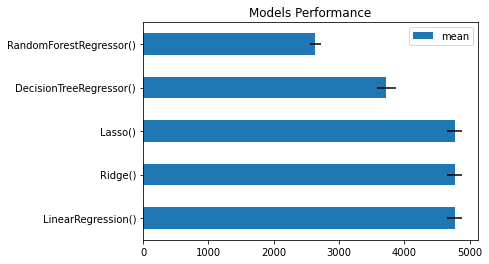

In [131]:
rmse_df.plot(kind='barh', y='mean', xerr='std', title='Models Performance', legend='False')

#### Parameter Tuning
***
Having selected the Random Forest model as the best model to explain our data, let us hypertune the parameters to improve our model

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=43)
param_grid = {
    "n_estimators": [200, 250, 300],
    "max_depth": [30, 60, 90, 120],
    "max_features": [18, 20, 22]
}

rf_reg = RandomForestRegressor()

rf_reg_tuned = GridSearchCV(estimator=rf_reg,
                            param_grid=param_grid,
                            cv=cv,
                            n_jobs=-1,
                            verbose=2)

rf_reg_tuned.fit(X_train, y_train)
rf_reg_tuned.best_estimator_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


RandomForestRegressor(max_depth=120, max_features=22, n_estimators=250)

Now, let's initialise our random forest best estimator

In [177]:
rf_reg_hypertuned = RandomForestRegressor(max_depth=90, max_features=18, n_estimators=250)

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=43)
rf_reg_hypertuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=90, max_features=30, n_estimators=250)

**Let us evaluate the preformance of our tuned model on the training data**

In [179]:
y_pred_train = rf_reg_hypertuned.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_r2_score = r2_score(y_train, y_pred_train)
print('RMSE', train_rmse, sep='\t')
print('r2_score', train_r2_score, sep='\t')

RMSE	1026.8854026056615
r2_score	0.960773558046778


**Let us evaluate the preformance of our tuned model on the validation (unseen) data**

In [180]:
y_pred_test = rf_reg_hypertuned.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_r2_score = r2_score(y_test, y_pred_test)
print('RMSE', test_rmse, sep='\t')
print('r2_score', test_r2_score, sep='\t')

RMSE	2843.8433128757624
r2_score	0.7137333350358837


### PREDICTIONS

In [49]:
test_df.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,4.000000,176.666667,0.0,1.000000,0.0,sp25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.000000,NaN,284.483333,1030.000000,287.483333,287.483333,801.000000,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,4.666667,266.666667,0.0,0.666667,0.0,sp25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.000000,NaN,282.483333,1030.333333,284.150000,284.150000,721.000000,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,4.000000,263.333333,0.0,0.666667,0.0,sp25,0.0,0,1023.000000,0.0,0.0,0.0,0,800.0,800.000000,1025.333333,800.333333,NaN,280.816667,1030.666667,282.816667,282.816667,800.000000,280.613333,42.000000,282.816667,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,2.333333,86.666667,0.0,1.333333,0.0,sp25,0.0,0,1025.666667,0.0,0.0,0.0,0,800.0,800.000000,1025.000000,800.333333,NaN,281.150000,1032.333333,283.483333,283.483333,801.333333,279.936667,45.000000,283.483333,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,4.666667,283.333333,0.0,1.000000,0.0,sp25,0.0,0,1026.000000,0.0,0.0,0.0,0,800.0,800.333333,1022.333333,800.000000,NaN,287.150000,1032.333333,287.150000,287.150000,801.333333,285.570000,41.000000,287.150000,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [50]:
test_df.isnull().sum()

Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp              0
Valencia_humidity         0
Valencia_temp_min   

In [51]:
df_test = test_df.copy()
df_test['Valencia_pressure'] = df_test['Valencia_pressure'].fillna(Valencia_pressure_mode)

In [52]:
df_test['time'] = pd.to_datetime(df_test.index)
df_test_eng = df_test.copy()
df_test_eng['Year'] = df_test['time'].dt.year
df_test_eng['Month'] = df_test['time'].dt.month
df_test_eng['Day'] = df_test['time'].dt.day
df_test_eng['Day_of_week'] = df_test['time'].dt.dayofweek
df_test_eng['Hour'] = df_test['time'].dt.hour
df_test_eng.drop('time', axis=1, inplace=True)
df_test_eng.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Year,Month,Day,Day_of_week,Hour
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,4.000000,176.666667,0.0,1.000000,0.0,sp25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.000000,1018.0,284.483333,1030.000000,287.483333,287.483333,801.000000,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000,2018,1,1,0,0
2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,4.666667,266.666667,0.0,0.666667,0.0,sp25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.000000,1018.0,282.483333,1030.333333,284.150000,284.150000,721.000000,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000,2018,1,1,0,3
2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,4.000000,263.333333,0.0,0.666667,0.0,sp25,0.0,0,1023.000000,0.0,0.0,0.0,0,800.0,800.000000,1025.333333,800.333333,1018.0,280.816667,1030.666667,282.816667,282.816667,800.000000,280.613333,42.000000,282.816667,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000,2018,1,1,0,6
2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,2.333333,86.666667,0.0,1.333333,0.0,sp25,0.0,0,1025.666667,0.0,0.0,0.0,0,800.0,800.000000,1025.000000,800.333333,1018.0,281.150000,1032.333333,283.483333,283.483333,801.333333,279.936667,45.000000,283.483333,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333,2018,1,1,0,9
2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,4.666667,283.333333,0.0,1.000000,0.0,sp25,0.0,0,1026.000000,0.0,0.0,0.0,0,800.0,800.333333,1022.333333,800.000000,1018.0,287.150000,1032.333333,287.150000,287.150000,801.333333,285.570000,41.000000,287.150000,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000,2018,1,1,0,12


In [53]:
test_encode_cat_features_df = pd.get_dummies(
    df_test_eng[cat_features], drop_first=True)
test_encode_cat_features_df.head()

,Valencia_wind_deg_level_10,Valencia_wind_deg_level_2,Valencia_wind_deg_level_3,Valencia_wind_deg_level_4,Valencia_wind_deg_level_5,Valencia_wind_deg_level_6,Valencia_wind_deg_level_7,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9,Seville_pressure_sp10,Seville_pressure_sp11,Seville_pressure_sp12,Seville_pressure_sp13,Seville_pressure_sp14,Seville_pressure_sp15,Seville_pressure_sp16,Seville_pressure_sp17,Seville_pressure_sp18,Seville_pressure_sp19,Seville_pressure_sp2,Seville_pressure_sp20,Seville_pressure_sp21,Seville_pressure_sp22,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2018-01-01 03:00:00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2018-01-01 06:00:00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2018-01-01 09:00:00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2018-01-01 12:00:00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [54]:
test_categorical_features_df = test_encode_cat_features_df[cat_features_selected]

In [55]:
test_numerical_features_df = df_test_eng[cont_features_selected]
#Scaled data by standardation
test_scaled_numerical_features_df = pd.DataFrame(
    scaler.fit_transform(test_numerical_features_df),
    columns = test_numerical_features_df.columns)
test_scaled_numerical_features_df.index = df_test.index

In [56]:
X_test_scaled = test_scaled_numerical_features_df.merge(test_categorical_features_df, on='time')

In [64]:
RF = RandomForestRegressor(max_depth=120, max_features=22, n_estimators=250)
RF.fit(X_scaled, y)

RandomForestRegressor(max_depth=120, max_features=22, n_estimators=250)

In [65]:
y_pred_total = RF.predict(X_scaled)
train_rmse = np.sqrt(mean_squared_error(y, y_pred_total))
train_r2_score = r2_score(y, y_pred_total)
print('RMSE', train_rmse, sep='\t')
print('r2_score', train_r2_score, sep='\t')

RMSE	1036.6706829237542
r2_score	0.960525619536563


In [66]:
test_redictions = RF.predict(X_test_scaled)

In [67]:
predictions_dict = {'time': test_df.index, 'load_shortfall_3h': test_redictions}
predictions_df = pd.DataFrame(predictions_dict)
#predictions_df.set_index('time')
predictions_df


,time,load_shortfall_3h
0,2018-01-01 00:00:00,7486.032000
1,2018-01-01 03:00:00,3947.102667
2,2018-01-01 06:00:00,3907.296000
3,2018-01-01 09:00:00,6356.720000
4,2018-01-01 12:00:00,6931.023333
...,...,...
2915,2018-12-31 09:00:00,12875.226000
2916,2018-12-31 12:00:00,14964.081333
2917,2018-12-31 15:00:00,14117.309333
2918,2018-12-31 18:00:00,15141.052000


In [69]:
Z = predictions_df.to_csv('model.csv', index=False)
print(Z)

None


<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic